In [165]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle

In [166]:
solution = pickle.load(open('solutions.pkl','rb'))
ref = pickle.load(open('encoded_reference_solutions.pkl','rb'))
energies = np.array(pickle.load(open('energies.pkl','rb')))

In [167]:
ref = [3.110e-01,  5.105e-02,  2.322e-01,  3.113e-02,  1.679e-01,  7.615e-02,  2.345e-02, -2.054e-02,  2.008e+02,  1.819e+02,  1.956e+02,  1.641e+02,  1.906e+02,  1.779e+02]
ref

[0.311,
 0.05105,
 0.2322,
 0.03113,
 0.1679,
 0.07615,
 0.02345,
 -0.02054,
 200.8,
 181.9,
 195.6,
 164.1,
 190.6,
 177.9]

In [168]:
idx = np.argmin(energies)
idx = 1
energies[idx]
ref = [ref]*10

In [169]:
energies

array([[-35722.03292166],
       [-35703.83316825],
       [-35707.98248599],
       [-35706.86539028],
       [-35679.87963652],
       [-35686.1686008 ],
       [-35633.3534824 ],
       [-35717.54215684],
       [-35694.95182639],
       [-35716.82092095]])

In [175]:
size = 150 * np.exp(-0.1 * (energies-energies.min()))
size

array([[1.50000000e+02],
       [2.43044619e+01],
       [3.68034550e+01],
       [3.29134752e+01],
       [2.21512045e+00],
       [4.15454621e+00],
       [2.11247776e-02],
       [9.57325927e+01],
       [9.99940675e+00],
       [8.90711263e+01]])

In [171]:
def plot_solutions(solutions, references, size, best_index):
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax1 = fig.add_subplot(121)

    ax1.axline((0, 0.0), slope=1.10, color="grey", linestyle=(0, (2, 5)))
    ax1.axline((0, 0.0), slope=1, color="black", linestyle=(0, (2, 5)))
    ax1.axline((0, 0.0), slope=0.90, color="grey", linestyle=(0, (2, 5)))
    ax1.grid()

    for r, sol, s in zip(references, solutions, size):
        ax1.scatter(
            r[:8], sol[:8], s=s, lw=1, edgecolors="w",alpha=0.5, facecolors='orange'
        )

    ax1.scatter(
        references[best_index][:8], solutions[best_index][:8], s=150, lw=1, edgecolors="w", facecolors='C0'
    )

    ax1.set_xlabel("Reference Values", fontsize=12)
    ax1.set_ylabel("QUBO Values", fontsize=12)
    ax1.set_title("Flow Rate", fontsize=14)

    ax2 = fig.add_subplot(122)

    ax2.axline((0, 0.0), slope=1.10, color="grey", linestyle=(0, (2, 5)))
    ax2.axline((0, 0.0), slope=1, color="black", linestyle=(0, (2, 5)))
    ax2.axline((0, 0.0), slope=0.90, color="grey", linestyle=(0, (2, 5)))

    for r, sol, s in zip(references, solutions, size):
        ax2.scatter(
            r[8:],
            sol[8:],
            s=s,
            lw=1,
            edgecolors="w",
            alpha=0.5, facecolors='orange'
        )
    ax2.scatter(
        references[best_index][8:], solutions[best_index][8:], s=150, lw=1, edgecolors="w", facecolors='C0'
    )
    ax2.grid()

    ax2.set_xlabel("Reference Values", fontsize=12)
    ax2.set_title("Pressure", fontsize=14)
    plt.show()

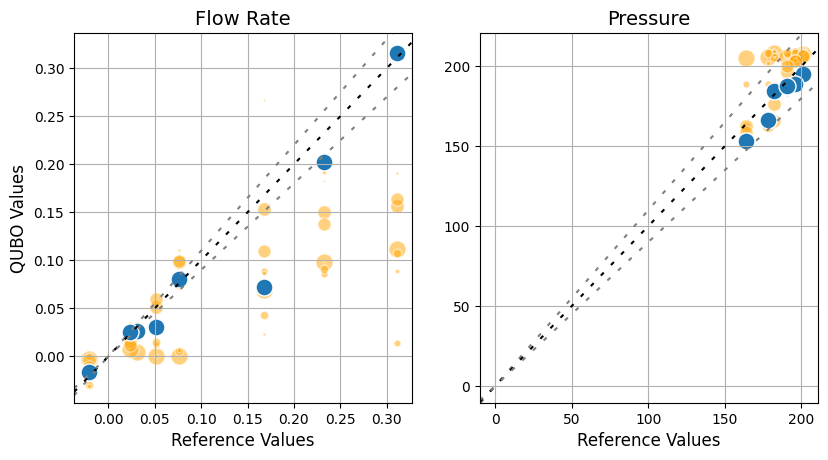

In [176]:
plot_solutions(solution, ref, size, 3)

In [79]:
solution

[array([ 1.11842552e-01,  0.00000000e+00,  9.77325458e-02,  4.35750204e-03,
         6.93050325e-02,  0.00000000e+00,  7.05500331e-03, -3.11250146e-03,
         2.07865559e+02,  2.07940010e+02,  2.06599902e+02,  2.05334245e+02,
         2.05483146e+02,  2.05706497e+02]),
 array([ 1.32800062e-02,  1.14125053e-02,  8.54900401e-02,  1.99200093e-02,
         8.90175417e-02,  7.28325341e-02,  1.95050091e-02, -0.00000000e+00,
         2.10173522e+02,  2.08386712e+02,  2.09280117e+02,  1.88955154e+02,
         2.07269956e+02,  1.88955154e+02]),
 array([ 1.07900051e-01,  1.47325069e-02,  9.06775425e-02,  2.98800140e-02,
         4.33675203e-02,  4.98000233e-03,  2.90500136e-02, -3.00875141e-02,
         2.08610064e+02,  2.05855398e+02,  2.08014460e+02,  1.62450806e+02,
         2.07940010e+02,  2.08163361e+02]),
 array([ 3.16230148e-01,  3.02950142e-02,  2.02727595e-01,  2.65600124e-02,
         7.26250340e-02,  8.03025376e-02,  2.49000117e-02, -1.59775075e-02,
         1.95060088e+02,  1.8441

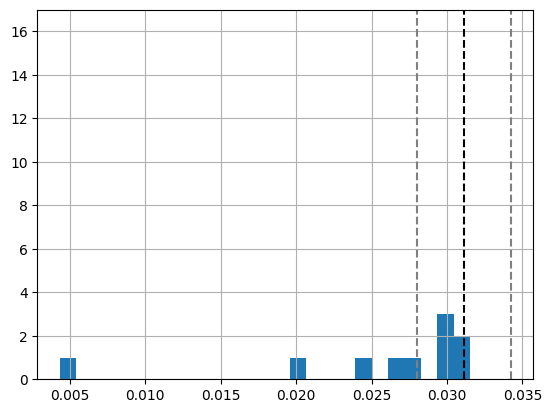

In [75]:
# plt.hist(np.array(solution)[:,3],bins=25)
idx = 3
plt.hist(np.array(solution)[:,idx],bins=25)
plt.vlines(ref[0][idx],0, 17,colors='black', ls='--')
plt.vlines(ref[0][idx]*0.9,0, 17,colors='grey', ls='--')
plt.vlines(ref[0][idx]*1.1,0, 17,colors='grey', ls='--')
plt.ylim([0,17])
plt.grid()

(array([1., 0., 2., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-35722.03292166, -35720.25933288, -35718.48574409, -35716.71215531,
        -35714.93856652, -35713.16497774, -35711.39138895, -35709.61780017,
        -35707.84421138, -35706.0706226 , -35704.29703381, -35702.52344502,
        -35700.74985624, -35698.97626745, -35697.20267867, -35695.42908988,
        -35693.6555011 , -35691.88191231, -35690.10832353, -35688.33473474,
        -35686.56114596, -35684.78755717, -35683.01396839, -35681.2403796 ,
        -35679.46679082, -35677.69320203, -35675.91961324, -35674.14602446,
        -35672.37243567, -35670.59884689, -35668.8252581 , -35667.05166932,
        -35665.27808053, -35663.50449175, -35661.73090296, -35659.95731418,
        -35658.18372539, -35656.41013661, -35654.63654782, -35652.86295903,
        -35651

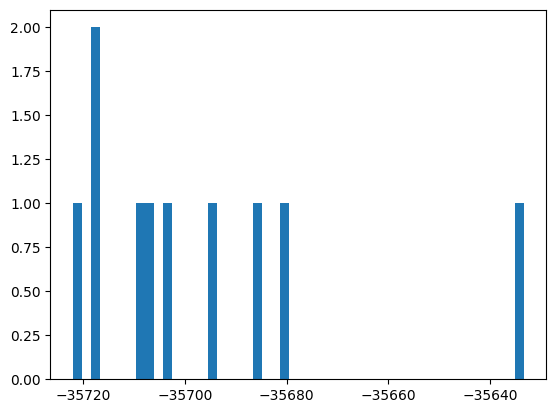

In [76]:
plt.hist(np.array(energies), bins=50)

In [77]:
distance = [np.linalg.norm(r[2:]-s[2:]) for r,s in zip(ref, solution)]

ValueError: x and y must be the same size

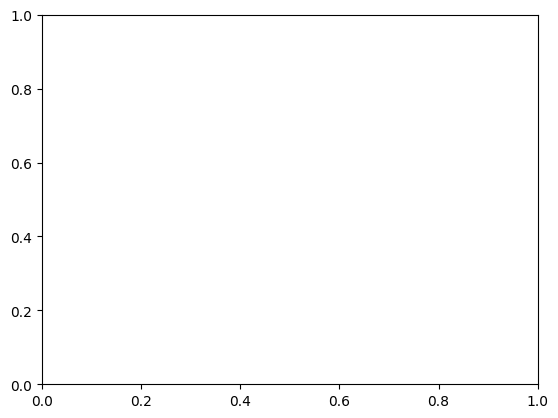

In [78]:
plt.scatter(energies, distance)

In [ ]:
idx_sort = np.argsort(distance)
plt.plot(distance[idx_sort], energies[idx_sort])

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
dd = [distance[i] for i in idx_sort]
ee = [energies[i] for i in idx_sort]

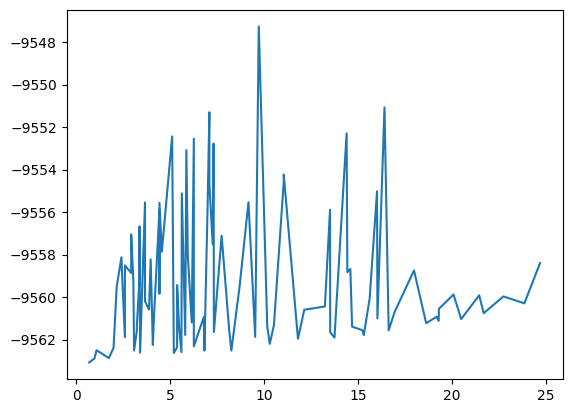

In [ ]:
plt.plot(dd,ee)